In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew

initial=pd.read_csv('shot distribution.csv')
df_2016=initial[initial['Unnamed: 0'] == 2016].copy()
df_other=initial[initial['Unnamed: 0'] != 2016].copy()
df_2016=df_2016.shift(axis=1)
df_2016.to_csv('2016.csv')


In [2]:
df_2016.head()

,Unnamed: 0,Season,TeamName,Off_1,RankOff_1,Off_2,RankOff_2,Off_3,RankOff_3,Def_1,RankDef_1,Def_2,RankDef_2,Def_3,RankDef_3
2854,NaN,2016,North Dakota,20.9292,151.0,53.2251,85.0,25.8457,261.0,19.1284,250.0,49.0826,218.0,31.7890,76.0
2855,NaN,2016,UAB,18.1928,287.0,52.5301,97.0,29.2771,172.0,17.5439,298.0,52.4561,87.0,30.0000,147.0
2856,NaN,2016,Delaware,24.1692,23.0,50.4532,171.0,25.3776,273.0,17.8855,288.0,42.9956,342.0,39.1189,2.0
2857,NaN,2016,Valparaiso,20.0382,203.0,47.0363,272.0,32.9254,83.0,22.3115,76.0,48.9067,223.0,28.7818,201.0
2858,NaN,2016,Jacksonville,17.3747,322.0,48.6874,236.0,33.9379,60.0,17.2461,307.0,48.3074,252.0,34.4465,23.0


In [3]:
df_other.head()

,Unnamed: 0,Season,TeamName,Off_1,RankOff_1,Off_2,RankOff_2,Off_3,RankOff_3,Def_1,RankDef_1,Def_2,RankDef_2,Def_3,RankDef_3
0,0,2025,Abilene Christian,22.256253,32.0,59.520163,3.0,18.223583,362.0,25.655977,1.0,51.311953,111.0,23.032070,360.0
1,1,2025,Air Force,18.314834,219.0,42.482341,349.0,39.202825,19.0,18.498091,218.0,52.100127,82.0,29.401782,269.0
2,2,2025,Akron,15.552326,337.0,46.511628,276.0,37.936047,43.0,19.270420,159.0,50.991277,121.0,29.738303,253.0
3,3,2025,Alabama,20.207743,103.0,46.081209,289.0,33.711048,114.0,19.724771,136.0,53.493296,44.0,26.781934,336.0
4,4,2025,Alabama A&M,22.189055,37.0,44.676617,326.0,33.134328,128.0,23.176521,18.0,45.748813,312.0,31.074666,193.0


In [4]:
dist = pd.concat([df_2016, df_other], ignore_index=True)


In [5]:
dist.head()

,Unnamed: 0,Season,TeamName,Off_1,RankOff_1,Off_2,RankOff_2,Off_3,RankOff_3,Def_1,RankDef_1,Def_2,RankDef_2,Def_3,RankDef_3
0,NaN,2016,North Dakota,20.9292,151.0,53.2251,85.0,25.8457,261.0,19.1284,250.0,49.0826,218.0,31.7890,76.0
1,NaN,2016,UAB,18.1928,287.0,52.5301,97.0,29.2771,172.0,17.5439,298.0,52.4561,87.0,30.0000,147.0
2,NaN,2016,Delaware,24.1692,23.0,50.4532,171.0,25.3776,273.0,17.8855,288.0,42.9956,342.0,39.1189,2.0
3,NaN,2016,Valparaiso,20.0382,203.0,47.0363,272.0,32.9254,83.0,22.3115,76.0,48.9067,223.0,28.7818,201.0
4,NaN,2016,Jacksonville,17.3747,322.0,48.6874,236.0,33.9379,60.0,17.2461,307.0,48.3074,252.0,34.4465,23.0


Dropping all ranks

In [6]:
dist=dist.drop(columns=['Unnamed: 0','RankOff_1','RankOff_2','RankOff_3','RankDef_1','RankDef_2','RankDef_3'],axis=1)

In [7]:
dist['Team/Year']=dist['Season'].astype(str) + ' ' +dist['TeamName']

dist=dist.drop(columns=['Season','TeamName'], axis=1)

In [8]:
popper=dist.pop('Team/Year')
dist.insert(0,'Team/Year',popper)
dist.head()

,Team/Year,Off_1,Off_2,Off_3,Def_1,Def_2,Def_3
0,2016 North Dakota,20.9292,53.2251,25.8457,19.1284,49.0826,31.7890
1,2016 UAB,18.1928,52.5301,29.2771,17.5439,52.4561,30.0000
2,2016 Delaware,24.1692,50.4532,25.3776,17.8855,42.9956,39.1189
3,2016 Valparaiso,20.0382,47.0363,32.9254,22.3115,48.9067,28.7818
4,2016 Jacksonville,17.3747,48.6874,33.9379,17.2461,48.3074,34.4465


In [9]:
dist.rename(columns={'Off_1':'FT','Off_2':'2PT','Off_3':'3PT','Def_1':'FTagainst','Def_2':'2PTagainst','Def_3':'3Ptagainst'}, inplace=True)

In [10]:
dist.head()

,Team/Year,FT,2PT,3PT,FTagainst,2PTagainst,3Ptagainst
0,2016 North Dakota,20.9292,53.2251,25.8457,19.1284,49.0826,31.7890
1,2016 UAB,18.1928,52.5301,29.2771,17.5439,52.4561,30.0000
2,2016 Delaware,24.1692,50.4532,25.3776,17.8855,42.9956,39.1189
3,2016 Valparaiso,20.0382,47.0363,32.9254,22.3115,48.9067,28.7818
4,2016 Jacksonville,17.3747,48.6874,33.9379,17.2461,48.3074,34.4465


In [11]:
dist.to_csv('check.csv')

In [12]:
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team/Year   8314 non-null   object 
 1   FT          8314 non-null   object 
 2   2PT         8314 non-null   float64
 3   3PT         8314 non-null   float64
 4   FTagainst   8314 non-null   float64
 5   2PTagainst  8314 non-null   float64
 6   3Ptagainst  8314 non-null   float64
dtypes: float64(5), object(2)
memory usage: 454.8+ KB


Because we know that some teams from 2021 did not play, we can drop 0 values automatically.
We only need to use one column for the drop.

In [13]:
dist=dist[dist['2PTagainst'] != 0]

In [14]:
dist.head()

,Team/Year,FT,2PT,3PT,FTagainst,2PTagainst,3Ptagainst
0,2016 North Dakota,20.9292,53.2251,25.8457,19.1284,49.0826,31.7890
1,2016 UAB,18.1928,52.5301,29.2771,17.5439,52.4561,30.0000
2,2016 Delaware,24.1692,50.4532,25.3776,17.8855,42.9956,39.1189
3,2016 Valparaiso,20.0382,47.0363,32.9254,22.3115,48.9067,28.7818
4,2016 Jacksonville,17.3747,48.6874,33.9379,17.2461,48.3074,34.4465


In [15]:
dist.nlargest(10,'3Ptagainst')

,Team/Year,FT,2PT,3PT,FTagainst,2PTagainst,3Ptagainst
621,2025 South Alabama,18.987342,46.413502,34.599156,14.867617,33.503055,51.629328
394,2025 Central Arkansas,17.946302,45.313236,36.740462,12.601626,40.813008,46.585366
7238,2004 Temple,19.7459,48.173600,32.080500,17.314900,38.252500,44.432600
6691,2005 Chattanooga,22.6994,54.601200,22.699400,16.209100,39.915500,43.875400
6580,2006 Temple,18.3633,48.103800,33.532900,17.881500,39.014200,43.104400
7893,2002 Temple,16.7086,45.759900,37.531500,16.790900,40.333200,42.875900
1098,2023 Bellarmine,15.905512,49.763780,34.330709,17.537135,39.770005,42.692861
2417,2019 South Dakota St.,17.388087,46.540881,36.071032,13.886537,43.437765,42.675699
1705,2021 South Alabama,18.059614,44.418469,37.521917,15.510204,41.982507,42.507289
5189,2010 Samford,16.7289,39.801000,43.470100,15.155000,42.479900,42.365100


In [16]:
dist['FT']=dist['FT'].astype(float)

In [17]:
numerical=dist.select_dtypes(exclude='object')

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


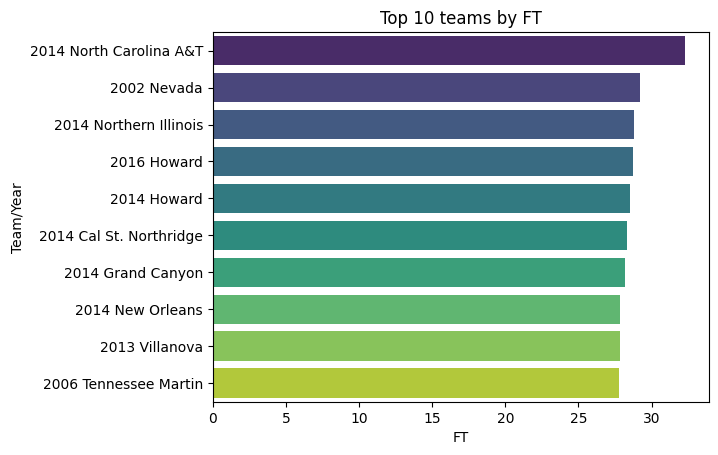

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


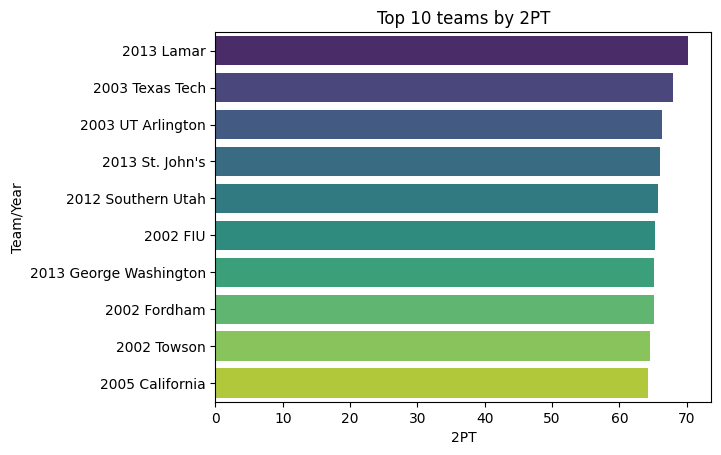

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


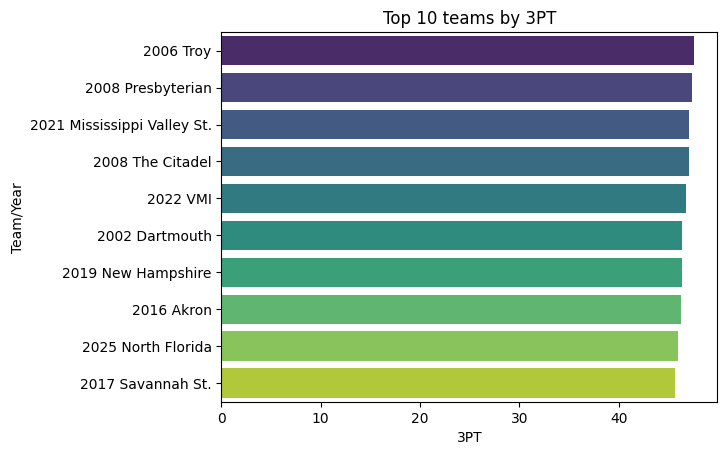

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


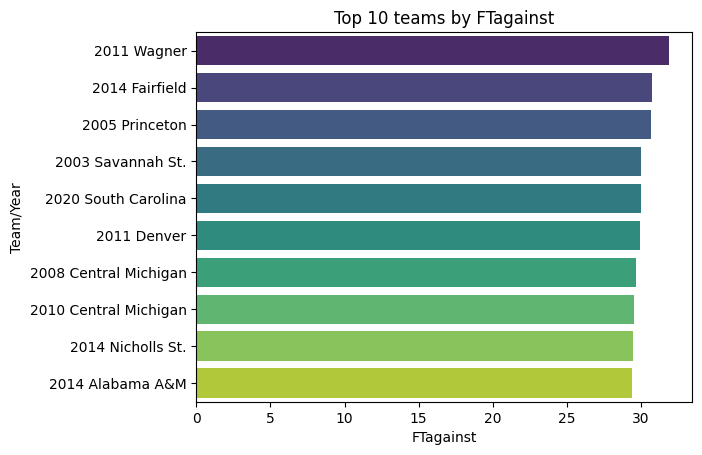

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


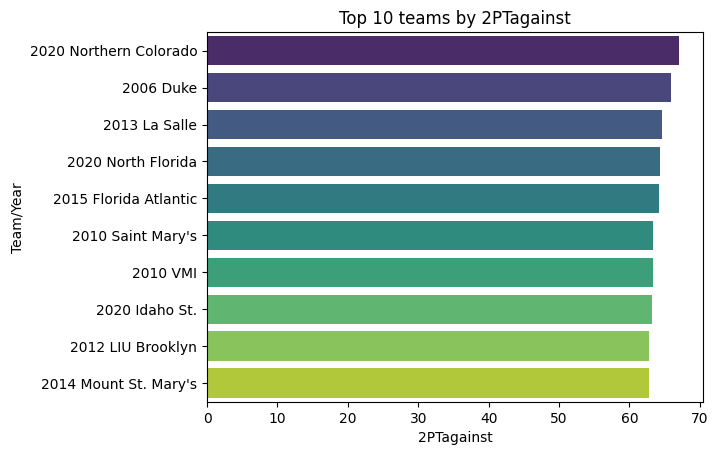

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/1042011581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


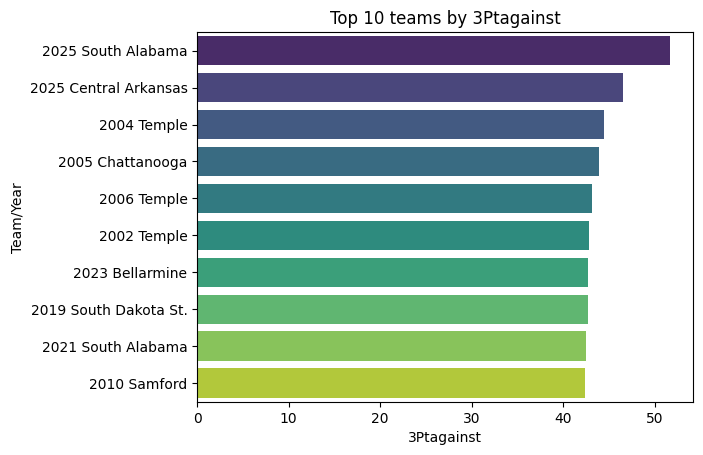

In [18]:
for col in dist.select_dtypes(include='number').columns:
    top_10=dist.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


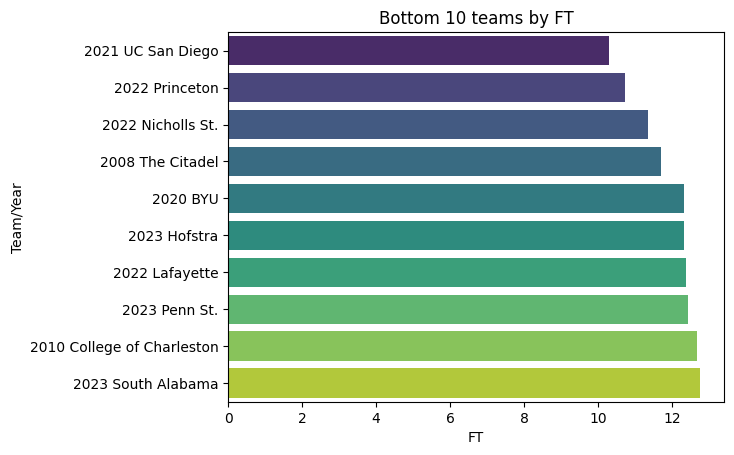

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


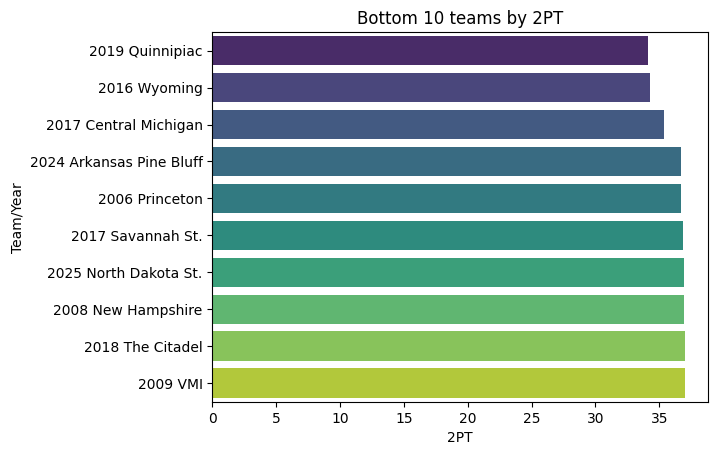

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


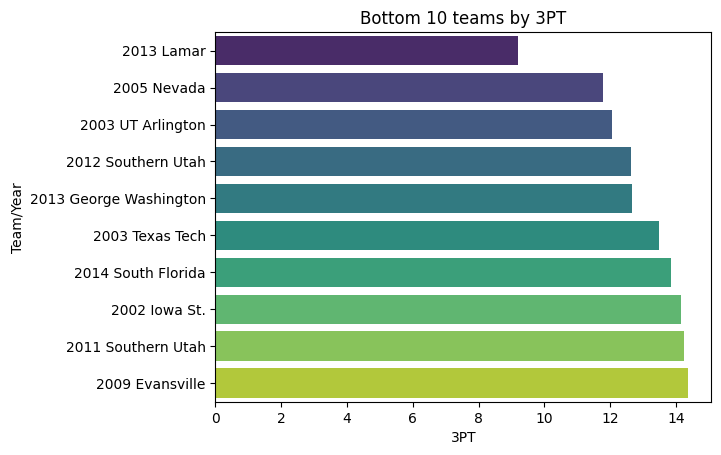

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


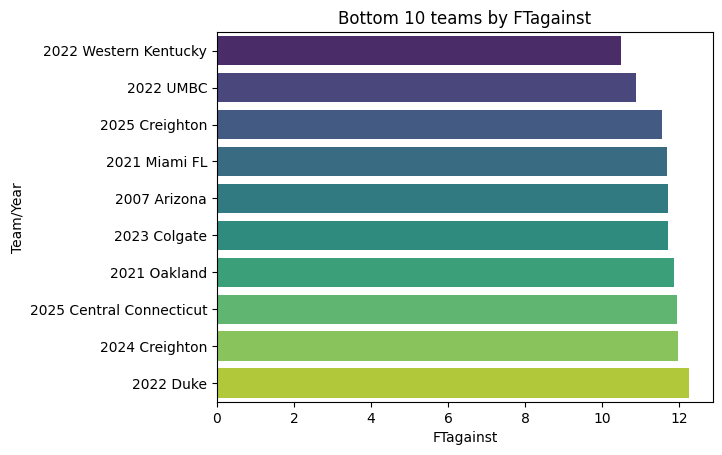

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


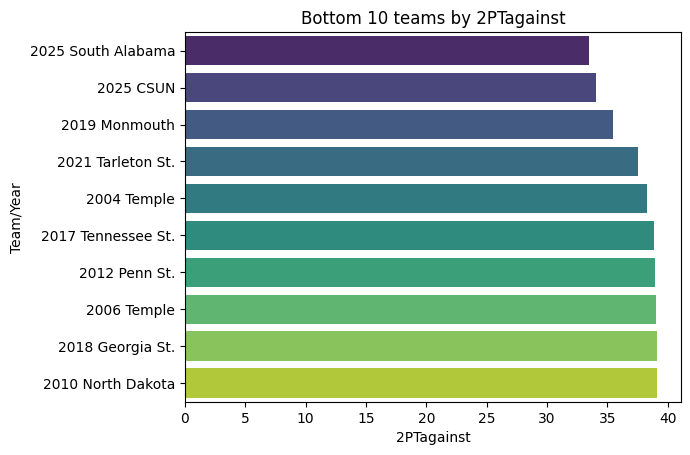

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_67247/118588952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


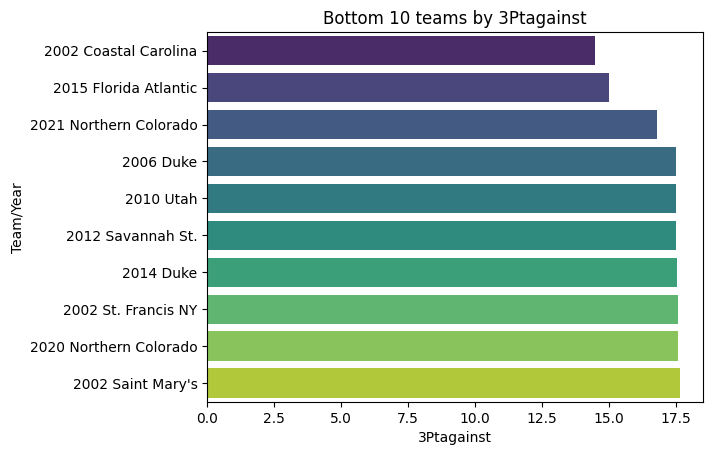

In [19]:
for col in dist.select_dtypes(include='number').columns:
    top_10=dist.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')
    plt.title(f'Bottom 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

Measuring Skew, Kurtosis and Multicollinearity

In [21]:
numerical.skew(axis=0, skipna=True)

FT            0.016171
2PT          -0.039757
3PT           0.160995
FTagainst     0.215163
2PTagainst   -0.074255
3Ptagainst    0.190578
dtype: float64

In [22]:
numerical.kurtosis(axis=0,skipna=True)

FT           -0.057364
2PT          -0.041882
3PT          -0.066450
FTagainst    -0.006476
2PTagainst    0.143855
3Ptagainst    0.143847
dtype: float64

Neither our skewness nor our kurtosis merits any further attention; let's determine multicollinearity, this time using a condition number (maximum/minimum of eigenvalues of the matrix)

In [25]:
import numpy.linalg as la 

cond=np.linalg.cond(numerical)
print('Condition Number:', cond)



Condition Number: 25523.53821713136


Woah! That multicollinearity is very high, way past our safety zone of 100. Once we actually get into regression analysis, we are going to have to apply Ridge Regression to handle issues, or possibly use PCA to condense features.

Bivariate Analysis using Pearson and Spearman

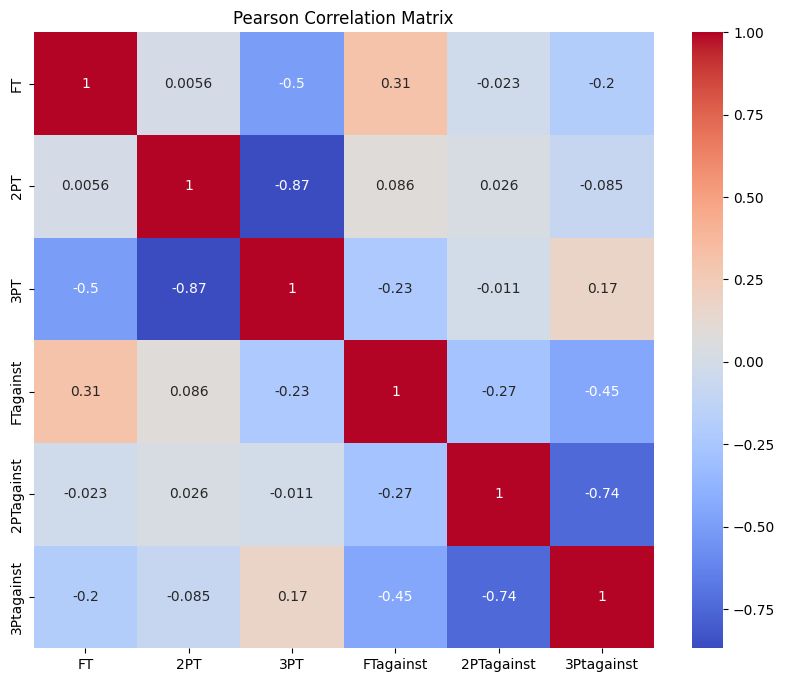

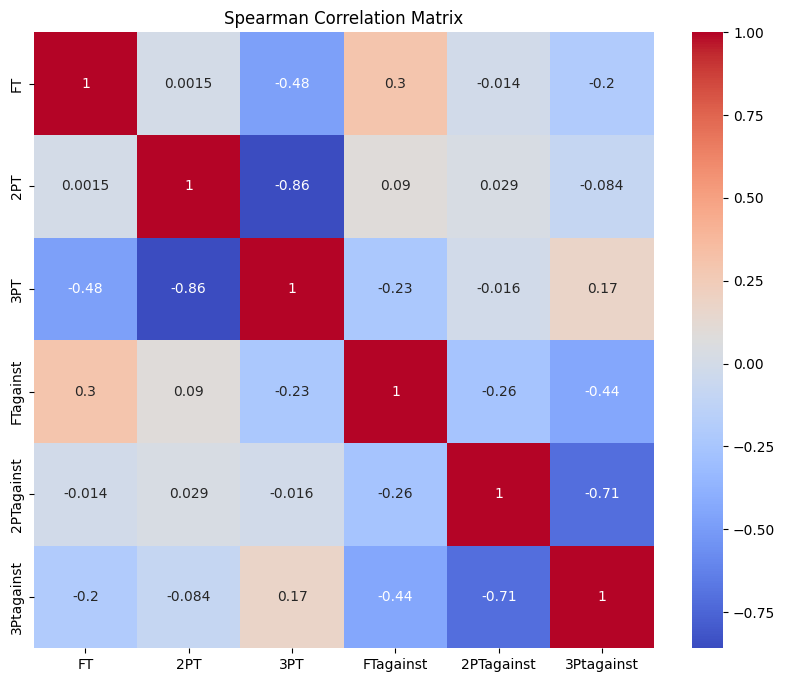

In [20]:
correlators=numerical
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Multivariate Analysis

In [30]:
import plotly.express as px
fig = px.scatter(
dist,
x='FT',
y='3PT',
hover_name='Team/Year',
title='Free Throw vs. 3 point distribution as a percentage of scoring',
trendline='ols'
)
fig.show()

In [31]:
fig = px.scatter(
dist,
x='FT',
y='2PT',
hover_name='Team/Year',
title='Free Throw vs. 2 point distribution as a percentage of scoring',
trendline='ols'
)
fig.show()

We see that although these is a negative correlation between teams that shoot a lot of three pointers and the amount they are fouled, there is no correlation between free throw percentages and 2 point shots.